In [2]:

import numpy as np 
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from nltk.corpus import stopwords
nltk.download()
nltk.download('stopwords')
stopwords.words('english')

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> q

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> x
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# **Problem**

AAPL, @apple etc. A look at the thought about Apple based on the containing tweets. Contributors were given a tweet and asked if the user was positive, negative or neutral about Apple. (They were also allowed to flag it as "the tweet is not related to Apple, Inc.")

* Data [Link](https://www.crowdflower.com/data-for-everyone/)




**Emotion Expressions consist of (1,3,5).**

* 1 : negative
* 3 : neutral
* 5 : positive
* not_relevant 

In [3]:
apple = pd.read_csv("/content/Apple-Twitter-Sentiment-DFE.csv", encoding = "latin-1")

In [4]:
display(apple)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,date,id,query,sentiment_gold,text
0,623495513,True,golden,10,NaN,3,0.6264,Mon Dec 01 19:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\nnot_relevant,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,623495514,True,golden,12,NaN,3,0.8129,Mon Dec 01 19:43:51 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,623495515,True,golden,10,NaN,3,1.0000,Mon Dec 01 19:50:28 +0000 2014,5.400000e+17,#AAPL OR @Apple,3,My cat only chews @apple cords. Such an #Apple...
3,623495516,True,golden,17,NaN,3,0.5848,Mon Dec 01 20:26:34 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,I agree with @jimcramer that the #IndividualIn...
4,623495517,False,finalized,3,12/12/14 12:14,3,0.6474,Mon Dec 01 20:29:33 +0000 2014,5.400000e+17,#AAPL OR @Apple,NaN,Nobody expects the Spanish Inquisition #AAPL
...,...,...,...,...,...,...,...,...,...,...,...,...
3881,623499442,True,golden,13,NaN,3,0.7757,Tue Dec 09 22:08:53 +0000 2014,5.420000e+17,#AAPL OR @Apple,5\n3,(Via FC) Apple Is Warming Up To Social Media -...
3882,623499450,True,golden,16,NaN,3,0.6225,Tue Dec 09 22:18:27 +0000 2014,5.420000e+17,#AAPL OR @Apple,3\n1,RT @MMLXIV: there is no avocado emoji may I as...
3883,623499486,True,golden,14,NaN,5,0.9347,Tue Dec 09 23:45:59 +0000 2014,5.420000e+17,#AAPL OR @Apple,5,@marcbulandr I could not agree more. Between @...
3884,623499514,True,golden,13,NaN,1,0.9230,Wed Dec 10 00:48:10 +0000 2014,5.420000e+17,#AAPL OR @Apple,1,My iPhone 5's photos are no longer downloading...


In [5]:
apple.columns


Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'sentiment', 'sentiment:confidence', 'date', 'id',
       'query', 'sentiment_gold', 'text'],
      dtype='object')

In [6]:
apple.shape

(3886, 12)

# **Missing Values**

In [7]:
apple.isnull().sum()

_unit_id                   0
_golden                    0
_unit_state                0
_trusted_judgments         0
_last_judgment_at        103
sentiment                  0
sentiment:confidence       0
date                       0
id                         0
query                      0
sentiment_gold          3783
text                       0
dtype: int64

In [8]:
apple["query"]

0       #AAPL OR @Apple
1       #AAPL OR @Apple
2       #AAPL OR @Apple
3       #AAPL OR @Apple
4       #AAPL OR @Apple
             ...       
3881    #AAPL OR @Apple
3882    #AAPL OR @Apple
3883    #AAPL OR @Apple
3884    #AAPL OR @Apple
3885    #AAPL OR @Apple
Name: query, Length: 3886, dtype: object

In [9]:
apple.drop(["_last_judgment_at","id","_unit_id","date"],axis= 1)

,_golden,_unit_state,_trusted_judgments,sentiment,sentiment:confidence,query,sentiment_gold,text
0,True,golden,10,3,0.6264,#AAPL OR @Apple,3\nnot_relevant,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,True,golden,12,3,0.8129,#AAPL OR @Apple,3\n1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,True,golden,10,3,1.0000,#AAPL OR @Apple,3,My cat only chews @apple cords. Such an #Apple...
3,True,golden,17,3,0.5848,#AAPL OR @Apple,3\n1,I agree with @jimcramer that the #IndividualIn...
4,False,finalized,3,3,0.6474,#AAPL OR @Apple,NaN,Nobody expects the Spanish Inquisition #AAPL
...,...,...,...,...,...,...,...,...
3881,True,golden,13,3,0.7757,#AAPL OR @Apple,5\n3,(Via FC) Apple Is Warming Up To Social Media -...
3882,True,golden,16,3,0.6225,#AAPL OR @Apple,3\n1,RT @MMLXIV: there is no avocado emoji may I as...
3883,True,golden,14,5,0.9347,#AAPL OR @Apple,5,@marcbulandr I could not agree more. Between @...
3884,True,golden,13,1,0.9230,#AAPL OR @Apple,1,My iPhone 5's photos are no longer downloading...


In [25]:
apple.sentiment.value_counts()

3               2162
1               1219
5                423
not_relevant      82
Name: sentiment, dtype: int64

# **Data Visualization**

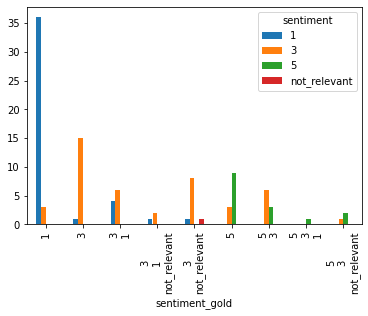

In [10]:
sentiment =apple.groupby(['sentiment_gold', 'sentiment']).sentiment.count().unstack()
sentiment.plot(kind='bar')
plt.show()

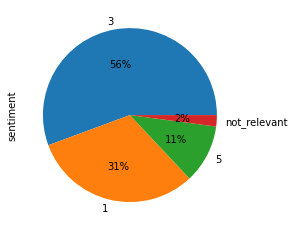

In [11]:
apple.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

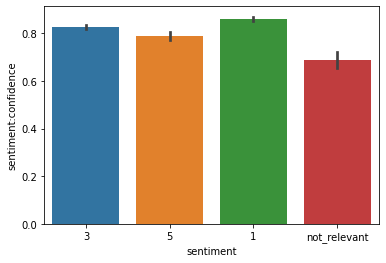

In [12]:
import seaborn as sns
sns.barplot(x='sentiment', y='sentiment:confidence' , data= apple)
plt.show()

# **Features**

The feature set will only consist of tweets.

In [13]:
features = apple.iloc[:, 11].values
labels = apple.iloc[:, 1].values

In [14]:
print(labels)

[ True  True  True ...  True  True  True]


In [15]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

# **Showing Text in Numerical Format**

Statistical algorithms use mathematics to train machine learning models. But math only works with numbers. To make statistical algorithms work with text, we first need to convert text to numbers. There are three main approaches to doing this: Word Bag, TF-IDF, and Word2Vec. In this section, we will use the word bag and the TF-IDF scheme.

**Word Bag**

A bag word scheme is the simplest way to convert text to numbers.For example, you have three documents :
Doc1 = "I like to play basketball", Doc2 = "it is good game",
Doc3 = "I prefer basketball to tennis"

The first step in the word bag approach is to build a vocabulary of all unique words. Our vocabulary for the three documents above would be:

In [17]:
Vocab = ["I, like, to, play, basketball, it,ıs, a, good, game, prefer, over, tennis"]

The next step is to use the vocabulary to convert each document into a feature vector. The length of each feature vector is equal to the length of the vocabulary. The frequency of the word in the document will replace the actual word in the vocabulary. If a word in the vocabulary is not found in the corresponding document, the document feature vector will be zero in that place. For example, the property vector for Doc1 will look like this.

In [18]:
[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

>In the TF-IDF Word bag approach, each word has the same weight. The idea behind the TF-IDF approach is that fewer words in all documents and more in individual documents contribute more to the classification.

>TF-IDF is a combination of two terms. Term frequency and Reverse Document frequency. They can be calculated as follows:

> TF= (Frequency of a word in the document) /(Total words in the document)

> IDF= Log((Total number of docs)/(Number of docs containing the word))

>TF-IDF using the Scikit-Learn Library To our luck, Python's Scikit-Learn library contains the class that can be used to convert TfidfVectorizermet's properties to TF-IDF property vectors. The following script does this:

In [19]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
stopwords.words('english')
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray() 

In the code above, we define it should be max_features = 2500, meaning it only uses 2500 most frequently occurring words to create a wordbag feature vector. Less frequent words are not very useful for classification.

Dividing Data into Training and Test Sets In the previous section, we converted the data into numerical form. As the last step before training our algorithms, we need to divide our data into training and test sets. The training set will be used to train the algorithm, while the test set will be used to evaluate the performance of the machine learning model.

In [20]:
from sklearn.model_selection import train_test_split

X_train ,X_test,y_train , y_test= train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In the above code, we are using the class in sklearn.model_selection module for train_test_split to split our data into training and test set. The method takes the property set as the first parameter, the label set as the second parameter, and the parameter test_size. We set a value of 0.2 for this, test_sizeb which means our data set will be divided into two sets, 80% and 20% data. We will use 80% dataset for training and 20% dataset for testing.

# **Training the Model**

>When data is divided into training and test sets, machine learning algorithms can be used to learn from training data. You can use any machine learning algorithm. However, we will use the Random Forest algorithm because of its ability to act on non-normalized data.

>The sklearn.ensembleModule contains the RandomForestClassifier class that can be used to train the machine learning model using the random forest algorithm. To do this, we need to call the RandomForestClassifiers method in the classroom and pass our training properties and tags as parameters to it. See the script below.

In [21]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

# **Predicting and Evaluating the Model**

>Once the model has been trained, the final step is to make predictions on the model. To do this we need to call the method RandomForestClassifier on the predict object of the class we are using for training. See the script below.

In [22]:
model_predict = text_classifier.predict(X_test)

>Finally, using such Classification metrics, confusion Metrix to evaluate the performance of automatic learning models, F1 measure, accuracy, etc.


>To find the values for this, you can use the utilities from classification_report, confusion_matrix, and accuracy_score to sklearn.metrics in the library. See the script below:

Finally, using such Classification metrics, to evaluate the performance of the automatic learning models, the accuracy of the confusion matrix, F1 measure, etc.

To find the values for this, you can use the utilities from classification_report, confusion_matrix, and accuracy_score to sklearn.metrics in the library. See the script below:

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,model_predict))
print(classification_report(y_test,model_predict))
print(accuracy_score(y_test, model_predict))

[[758   1]
 [ 19   0]]
              precision    recall  f1-score   support

       False       0.98      1.00      0.99       759
        True       0.00      0.00      0.00        19

    accuracy                           0.97       778
   macro avg       0.49      0.50      0.49       778
weighted avg       0.95      0.97      0.96       778

0.974293059125964
